# Coursework2 - PDE4433 - Ashwin Murali Thanalapati / M01037932

## Global imports

In [10]:
import os
import tensorflow as tf
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from PIL import Image
from matplotlib import pyplot as plt

## Model Training

Classes: ['Forest', 'Plains', 'Mountain', 'Desert']
Images shape: (3196, 128, 128, 3)
Labels shape: (3196,)
Training images shape: (2556, 128, 128, 3)
Training labels shape: (2556,)
Testing images shape: (640, 128, 128, 3)
Testing labels shape: (640,)
Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5334 - loss: 1.1972 - val_accuracy: 0.8375 - val_loss: 0.4395
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8470 - loss: 0.4160 - val_accuracy: 0.8953 - val_loss: 0.3105
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8696 - loss: 0.3446 - val_accuracy: 0.8984 - val_loss: 0.2884
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8859 - loss: 0.3118 - val_accuracy: 0.8484 - val_loss: 0.3612
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9007 - loss: 0.2566 - val_accuracy: 0.9031 - val_loss: 0.2591
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9274 - loss: 0.1954 - val_accuracy: 0.8844 - val

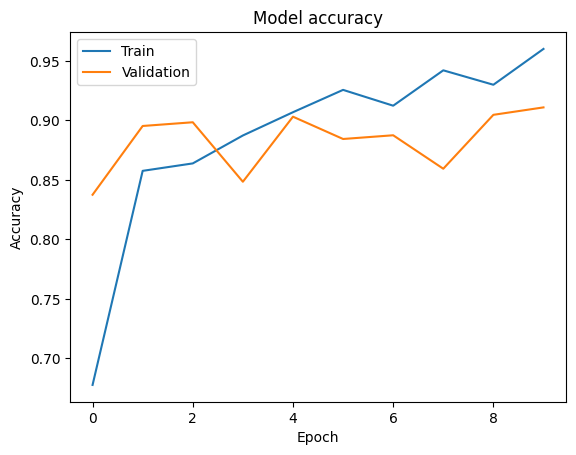

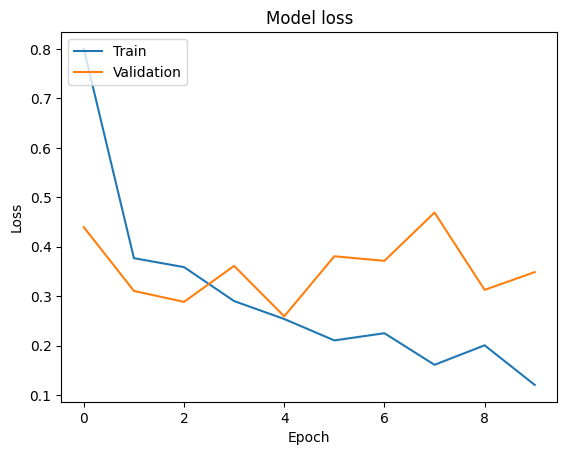

In [11]:
dataset_path = 'Terrains'

# Get the list of classes (subfolders)
classes = [f for f in os.listdir(dataset_path) if f!= '.DS_Store']
print(f"Classes: {classes}")
num_classes = len(classes)

images = []
labels = []
img_height = 128
img_width = 128

# Loop through each class folder
for i, terrain_type in enumerate(classes):
    # Define the path to the current class folder
    class_path = os.path.join(dataset_path, terrain_type)

    # Get the list of image files in the current class folder
    image_files = os.listdir(class_path)

    # Loop through each image file
    for image_file in image_files:
        # Define the path to the current image file
        image_path = os.path.join(class_path, image_file)

        # Load the image using PIL
        img = Image.open(image_path).convert('RGB')

        # Resize the image to a fixed size (e.g., 128x128)
        img = img.resize((img_height, img_width))

        # Convert the image to a numpy array and normalize it
        img_array = np.array(img) / 255.0

        # Append the image array to the images list
        images.append(img_array)

        # Append the label (class index) to the labels list
        labels.append(i)

# Convert the lists to numpy arrays
images_np = np.array(images)
labels_np = np.array(labels)

# Print the shapes of the images and labels arrays
print("Images shape:", images_np.shape)
print("Labels shape:", labels_np.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_np, labels_np, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

# Define a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()